<img src="VL04_Material/colormap_sequential.png" width="80%" /> 
<div class="tinyfont">https://matplotlib.org/stable/tutorials/colors/colormaps.html</div>

# <div style="color:blue;">1. Die Holdout-Methode</div>
# <div>2. Indizierung in Pandas</div>

### 1.1 Wiederholung: Matplotlib

**Grundlegende Plotbefehle:**
- `plt.scatter` / `ax.scatter`: Punkte
- `plt.plot` / `ax.plot`: Linien

**Beschriftungen:**
- `plt.xlabel` / `ax.set_xlabel` (ebenso für y)
- `plt.xticks` / `ax.set_xticks` (ebenso für y)
- \- / `ax.set_xticklabels` (ebenso für y)
- `plt.title` / `ax.set_title`: Titel je Plot
- `plt.suptitle` / - : Titel über Subplots

**Skalierung und Formatierung:**
- `plt.xlim` / `ax.set_xlim` (ebenso für y)
- `plt.tight_layout` / - : Subplot-Abstände

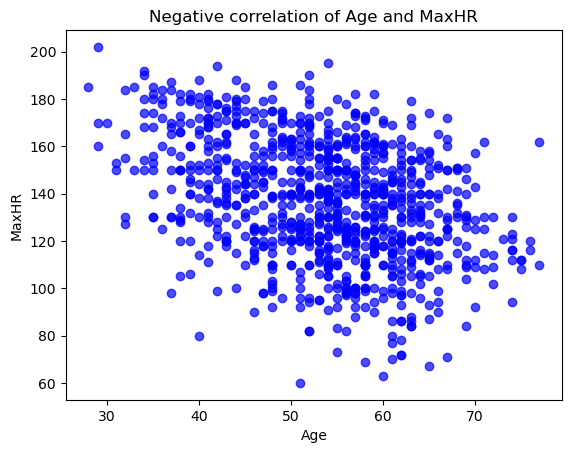

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("VL02_Material/heart.csv")

plt.scatter ( df["Age"],df["MaxHR"],
              alpha=0.7, color="blue" )
plt.xlabel("Age")
plt.ylabel("MaxHR")
plt.title("Negative correlation of Age and MaxHR");


Integration der Zusatzinformation "HeartDisease" (<span style="color:orange"><b>Frage:</b> Können Sie eine Legende hinzufügen?</span>):

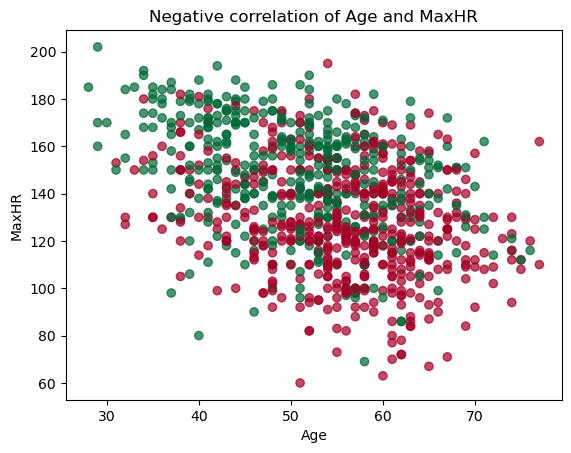

In [3]:
plt.scatter ( df["Age"],df["MaxHR"], alpha=0.7,
              c=df["HeartDisease"], cmap="RdYlGn_r" )
plt.xlabel("Age")
plt.ylabel("MaxHR")
plt.title("Negative correlation of Age and MaxHR");

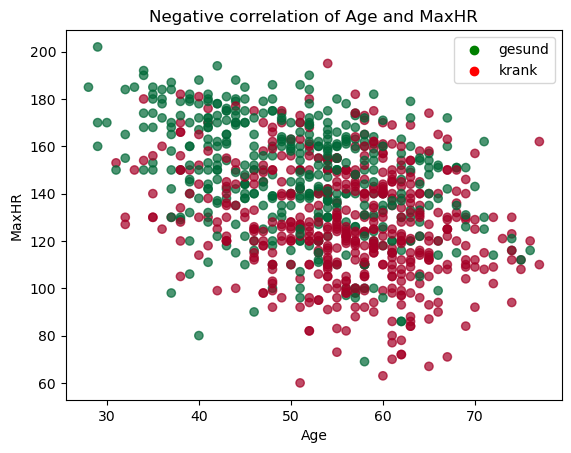

In [9]:
plt.scatter ( df["Age"],df["MaxHR"], alpha=0.7,
              c=df["HeartDisease"], cmap="RdYlGn_r" )
plt.xlabel("Age")
plt.ylabel("MaxHR")
plt.title("Negative correlation of Age and MaxHR")

# Legende faken
plt.scatter([],[],label="gesund", color="green")
plt.scatter([],[],label="krank", color="red")
plt.legend();

Der Parameter `cmap` spezifiziert eine [ColorMap](https://matplotlib.org/stable/tutorials/colors/colormaps.html), z.B.:

| <img src="VL04_Material/colormap_diverge.png" width="100%" /> | <img src="VL04_Material/colormap_qual.png" width="100%" /> |
|---|---|
|<img src="VL04_Material/colormap_sequential.png" width="100%" /> | <img src="VL04_Material/colormap_uniform.png" width="100%" /><img src="VL04_Material/colormap_cyclic.png" width="100%" />

**For many applications, a perceptually uniform colormap is the best choice**; i.e. a colormap in which equal steps in data are perceived as equal steps in the color space.

- Sequential: (...) should be used for representing information that has ordering.

- Diverging: (...) should be used when the information being plotted has a critical middle value, such as topography or when the data deviates around zero.

- Cyclic: (...) should be used for values that wrap around at the endpoints, such as phase angle, wind direction, or time of day.

- Qualitative: (...) should be used to represent information which does not have ordering or relationships.

<div class="tinyfont">https://matplotlib.org/stable/tutorials/colors/colormaps.html</div>

In [ ]:
# Legende faken
#plt.scatter([],[], color="green", label="gesund")
#plt.scatter([],[], color="red", label="krank")
#plt.legend()

Verwendung von Colormaps:

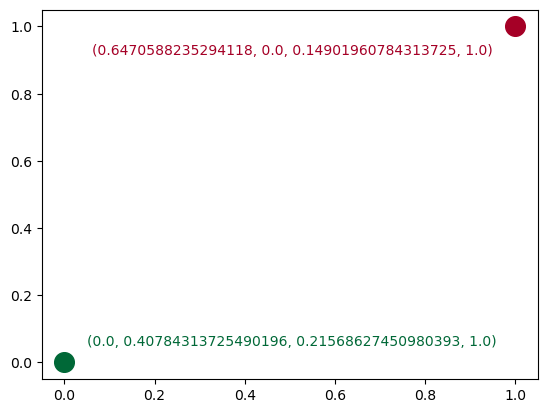

In [244]:
# Die Werte, die via c=... spezifiziert werden,
# werden zu [0,1] normiert und als Input für
# die cmap verwendet.
cmap = plt.get_cmap("RdYlGn_r")
plt.scatter ( [0],[0], color=cmap(0.0), s=200 )
plt.scatter ( [1],[1], color=cmap(1.0), s=200 )
plt.text(x=0.05,y=0.05,s=cmap(0.0), color=cmap(0.0))
plt.text(x=0.95,y=0.95,s=cmap(1.0), color=cmap(1.0),
         ha="right", va="top");


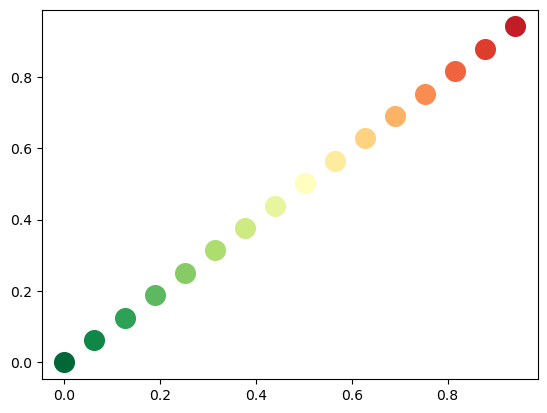

In [250]:
# Vorsicht: Integers werden anders interpretiert.
# Es gilt hier cmap(255)==cmap(1.0)
# bzw.         cmap(1)==cmap(1/255)
# (unterschiedlich je cmap)

for i in range(0,256,16): # nur jeder 16. Punkt
    plt.scatter ( [i/255],[i/255],
                  color=cmap(i), s=200 )
    
    

Mit dem Pandas-Wrapper in einer Zeile:

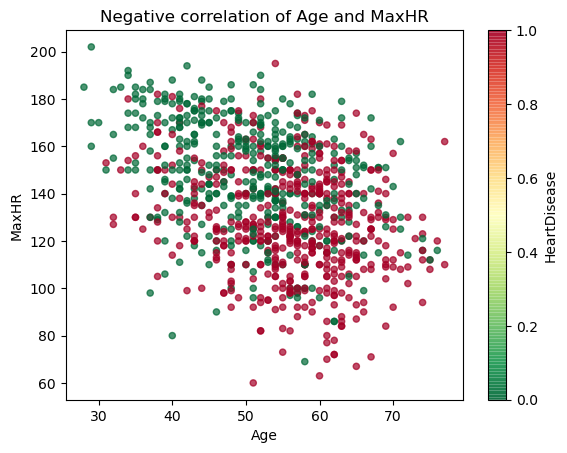

In [63]:
# cmap wie bisher:
df.plot.scatter( "Age", "MaxHR", c="HeartDisease",
                  cmap="RdYlGn_r", alpha=0.7,
    title="Negative correlation of Age and MaxHR" );
# set colorbar=False to hide the colorbar 


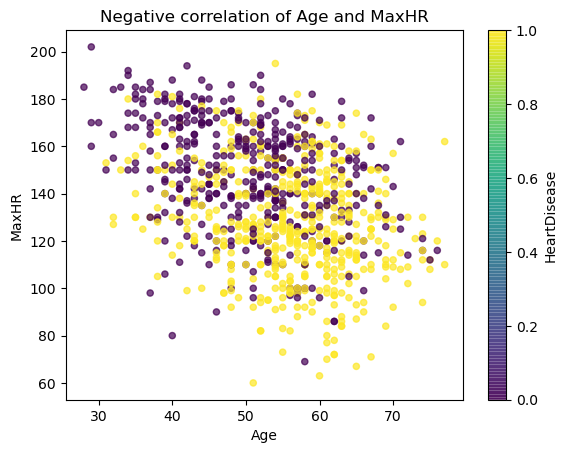

In [269]:
# andere cmap (besser oder schlechter?):
df.plot.scatter( "Age", "MaxHR", c="HeartDisease",
                  cmap="viridis", alpha=0.7,
    title="Negative correlation of Age and MaxHR" );
# set colorbar=False to hide the colorbar 


Relevanz der Farbwahl bzgl. Sehschwächen: <span class="tinyfont">https://www.color-blindness.com/coblis-color-blindness-simulator/</span>
<center><img src="VL04_Material/colorblind_01.png" width="70%" /></center>

Relevanz der Farbwahl bzgl. Sehschwächen: <span class="tinyfont">https://www.color-blindness.com/coblis-color-blindness-simulator/</span>
<center><img src="VL04_Material/colorblind_02.png" width="70%" /></center>

Relevanz der Farbwahl bzgl. Sehschwächen: <span class="tinyfont">https://www.color-blindness.com/coblis-color-blindness-simulator/</span>
<center><img src="VL04_Material/colorblind_03.png" width="70%" /></center>

Etwa 5% der Menschen hat eine Rot-Grün-Schwäche (RGS).
<div class="alert alert-block alert-warning"><b>Aufgabe: </b>Was ist die Wahrscheinlichkeit, dass von n=30 Studierenden mindestens eine Person eine RGS hat?</div>
&nbsp;  

&nbsp;  


$
P(\text{mind. 1 RGS}) = 1 - P(\text{genau 0 RGS})
$

$
 = 1 - \prod_{i=1}^n P(\text{Person i hat keine RGS})
$

$
 = 1 - (1-0.05)^n = 78.5 \%
$

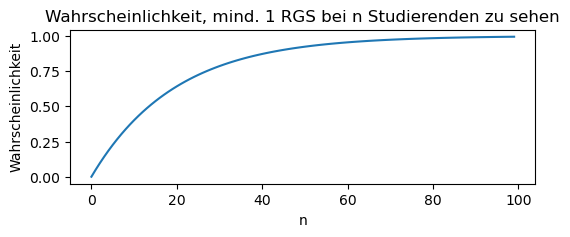

In [12]:
x = np.arange(0,100); y = 1-(1-0.05)**x
fig, ax = plt.subplots ( figsize=(6,2) )
ax.plot ( x, y )
ax.set_title ( "Wahrscheinlichkeit, mind. 1 RGS bei "+
               "n Studierenden zu sehen" )
ax.set_xlabel("n"); ax.set_ylabel("Wahrscheinlichkeit");


&nbsp;  

&nbsp;  
**Best practice:** Sehschwächen sollten
berücksichtigt werden.

**Darüberhinaus wichtig:** Unwahrscheinliche Ereignisse werden wahrscheinlich, wenn sie genügend Möglichkeiten haben, einzutreten.

### 1.2 Wiederholung: Konfusionsmatrix und Accuracy-Metrik

In [216]:
y    = [1,1,1,0,0,0,0,0,0] # wahr
pred = [1,1,0,0,0,1,1,1,1] # vorhergesagt


<div class="alert alert-block alert-warning">
    
<b>True Positives (TP):</b> ?

<b>False Positives (FP):</b> ?

<b>True Negatives (TN):</b> ?

<b>False Negatives (FN):</b> ?
</div>
&nbsp;  

&nbsp;  

&nbsp;  

&nbsp;  

&nbsp;  

&nbsp;  


In [217]:
TP = 2
FP = 4
TN = 2
FN = 1

accuracy = (TP+TN)/(TP+TN+FP+FN)
accuracy


0.4444444444444444

In [218]:
from sklearn.metrics import accuracy_score
accuracy_score ( y, pred )


0.4444444444444444

 ### 1.3 Wiederholung: Overfitting beim Entscheidungsbaum
 
 Wir haben bereits gesehen, dass ein Machine Learning Modells (konkret: ein Entscheidungsbaum zur binären Klassifikation) auf den Testdaten schlechter performen kann als auf den Trainingsdaten. Man spricht von einem **Overfit**.

**Gründe:**
 - Das Modell verwendet Unterschiede in den Merkmalen (Features) zwischen den Gruppen\* "krank" und "gesund", die allein aus Zufallsgründen in der verwendeten Trainingsdatenmenge vorliegen.
 - Man sagt, **das Modell generalisiert nicht** (oder: "das Modell lernt die Trainingsdaten auswendig") wenn diese verwendeten Unterschiede auf neuen Daten nicht mehr nutzbar sind.
<div class="tinyfont">* bei einer Regression oder einer Multiclass-Klassifikation analog</div>

**Gegenmaßnahmen, um den Zufallseinfluss zu verringern:**
- Erhöhung der zum Training verwendeten Beobachtungen (mehr Zeilen im Dataframe)
- Verringerung der verwendeten Features  
(weniger Spalten im Dataframe)

**Gegenmaßnahmen, um das Modell robuster zu machen:**
- Verringerung der Parameterzahl (z.B. Verringerung der Baumtiefe bei einem Entscheidungsbaum)
- Regularisierung (hohe Parameterwerte werden durch Gewichtsterme bestraft, z.B. "weight decay" bei neuronalen Netzwerken)
- early stopping bei iterativen Verfahren, ...

**Beispiel** für eine Abweichung der Performance auf Trainings- und Testdaten ("Overfit"):

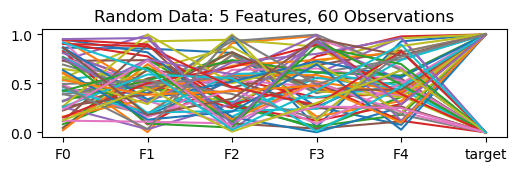

In [212]:
# best practice: use a seeded random number generator
R = np.random.default_rng ( seed=13 )

# random data: 5 features, 1 target value, 60 rows
df = pd.DataFrame ( R.uniform( size=(60,6) ) )
df.columns = ["F"+str(i) for i in range(5)]+["target"]

# make the target variable binary
df.iloc[:,-1] = df.iloc[:,-1].round().astype("int")
df.T.plot(legend=False, title="Random Data: 5 Features, 60 Observations");
plt.gcf().set_size_inches( (6,1.4) ) # make smaller

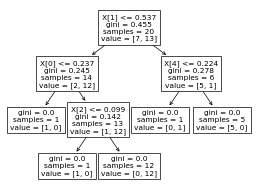

In [213]:
# Split into training and validation set
X_train = df.iloc[:20,:-1]; X_val = df.iloc[20:40,:-1]
y_train = df.iloc[:20,-1];  y_val = df.iloc[20:40,-1]

# Train the decision tree
from sklearn import tree
clf = tree.DecisionTreeClassifier ( random_state=0 )
clf.fit ( X_train, y_train )
tree.plot_tree ( clf )
plt.gcf().set_dpi ( 50 ) # make smaller

In [219]:
# Training accuracy
pred_train = clf.predict ( X_train )
accuracy_score ( pred_train, y_train )


1.0

In [220]:
# Validation accuracy => Overfit
pred_val = clf.predict ( X_val )
accuracy_score ( pred_val, y_val )


0.5

**Immer wichtig:**

Kontrolle des Overfits auf einem Datensatz, der nicht zum Training verwendet wurde:
- "Testdatensatz" beim einmaligen Trainieren eines Machine Learning Modells

&nbsp;
- "Validierungsdatensatz", wenn mehrere Modelle oder mehrere Trainingsdurchgänge betrachtet werden sollen  
(danach EINMALIGE Auswertung auf dem Testdatensatz für das finale Modell)

### 1.4 Wiederholung: Hyperparameter-Tuning

Machine Learning Modelle haben sog. **Hyperparameter**, die vor dem Training vom Anwender gesetzt werden und das Trainingsverhalten bestimmen (z.B. Baumtiefe beim Entscheidungsbaum).

"Hyper" in Abgrenzung zu den eigentlichen Modellparametern, die der Algorithmus während des Trainings bestimmt.

Wenn Hyperparameter versuchsweise gesetzt werden und dann, nach dem Training, angepasst werden, um die Modell-Performance zu verbessern, spricht man von **Hyperparameter-Tuning**.

Hierbei muss aufgepasst werden, dass -- obwohl danach der Overfit auf Testdaten evaluiert wird -- durch **multiples Testen** das gewählte Modell besser aussieht, als es tatsächlich ist (auch das ist Overfit!):

- Aus Zufallsgründen sehen einige Modelle besser aus als andere. Wenn "genügend viele" Modelle betrachtet werden, kann die Performance "beliebig gut" aussehen.
- Daher Modellauswahl (bzw. Hyperparameter-Tuning) auf einem separaten Validierungsdatensatz und finale Bewertung auf einem **nur einmal verwendeten Testdatensatz**.

**Beispiel** für eine *scheinbar* gute Performance auf mehrmals verwendeten Validierungsdaten:

In [477]:
acc_train = dict()
acc_val   = dict()

for max_depth in [1,2,3,4,5]:
    for min_samples_leaf in [1,2,3,4,5]:
        for max_features in [1,2,3,4,5]:   # another hyperparameter (usually not used for a single tree)
            # train a decision tree with the specified hyperparameters
            clf = tree.DecisionTreeClassifier ( max_depth = max_depth, min_samples_leaf=min_samples_leaf,
                                                max_features = max_features,
                                                random_state=0 )
            clf.fit ( X_train, y_train )
            
            # calculate the accuracy metric on the training and the validation set
            pred_train = clf.predict ( X_train )
            pred_val = clf.predict ( X_val )
            acc_train[ (max_depth, min_samples_leaf, max_features) ] = accuracy_score ( pred_train, y_train ) # from sklearn
            acc_val  [ (max_depth, min_samples_leaf, max_features) ] = accuracy_score ( pred_val, y_val )

In [478]:
# the best accuracy values on the validation set
# (indexed by the hyper-parameters)
pd.Series(acc_val).sort_values(ascending=False).head()


3  5  2    0.7
5  5  2    0.7
4  5  2    0.7
2  5  2    0.7
1  5  2    0.6
dtype: float64

In [224]:
# re-train with the optimal choice
clf = tree.DecisionTreeClassifier ( random_state=0,
    max_depth=3, min_samples_leaf=5, max_features=2 )
clf.fit ( X_train, y_train )

# accuracy on the test set (=> overfit!)
X_test = df.iloc[40:,:-1]; y_test = df.iloc[40:,-1]
pred_test = clf.predict ( X_test )
accuracy_score ( pred_test, y_test )


0.5

### 1.5 Zusammenfassung: Holdout-Methode

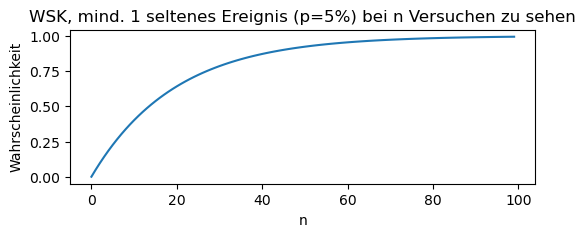

In [472]:
x = np.arange(0,100); y = 1-(1-0.05)**x
fig, ax = plt.subplots ( figsize=(6,2) )
ax.plot ( x, y )
ax.set_title ( "WSK, mind. 1 seltenes Ereignis (p=5%)"+
               " bei n Versuchen zu sehen" )
ax.set_xlabel("n"); ax.set_ylabel("Wahrscheinlichkeit");


Das Unterteilen der Daten in Trainings-, Validierungs- und Testdatensatz wird **Holdout-Methode** genannt.

- Auf dem **Trainingsdatensatz** wird ein Machine Learning Modell trainiert.

- Der **Validierungsdatensatz** dient zur Überprüfung, ob ein Overfit vorliegt: Wie gut ist das Modell auf Daten, die nicht zum Trainieren verwendet wurden?

- Beim Hyperparameter-Tuning werden viele Modelle trainiert; es besteht die Gefahr, dass beim Vergleich der Validierungsperformance ein Modell nur aus Zufallsgründen "gut aussieht".  
&nbsp;  
Daher wird das finale Modell einmalig auf dem **Testdatensatz** evaluiert, um eine finale Aussage über die Generalisierungsfähigkeit zu erhalten.

<div class="tinyfont">(Die Abbildung links zeigt den "worst case", wenn die Ereignisse unabhängig sind, wie bei der RGS. Beim Hyperparameter-Tuning werden Performances der Modelle positiv korrelieren (d.h. recht ähnlich sein). Es wird daher länger dauern, bis man aus Zufallsgründen gute Ergebnisse sieht.)</div>

### 1.6 Der Tree-Split-Algorithmus `tree.DecisionTreeClassifier().fit(X,y)`

Es seien Daten $Q$ gegeben mit $(x,y)\in Q$, wobei $x\in \mathbb{R}^n$ Features sind und $y\in \{0,1\}$ Labels.

Es sei $p(Q)$ der Anteil der "$y=1$"-Labels in $Q$. Dann ist die **Gini-Impurity** definiert via $H(Q) = 2p(Q)(1-p(Q))$.

**Algorithmus:** <span class="tinyfont">Modifikation des CART-Algorithmus: https://scikit-learn.org/stable/modules/tree.html#tree-mathematical-formulation; siehe auch ID3, C4.5 und C5.0 für alternative Implementationen.</span> 
<div class="smallfont">
1. Für jedes Feature $j\in\{1,...,n\}$ und jeden möglichen Splitwert $t$, zerlege die Daten in Mengen $Q^\text{left}(j,t)$ und $Q^\text{right}(j,t)$, definiert via
\begin{align*}
Q^\text{left}(j,t) &= \{(x,y)\in Q\,|\,x_j \le t \} \\
Q^\text{right}(j,t) &= Q \setminus Q^\text{left}(j,t)
\end{align*}
</div>

<div class="smallfont">2. Die Qualität eines Splits $\theta = (j,t)$ wird bewertet durch eine Impurity-Funktion $H$ (z.B. Gini-Impurity oder Entropie):
\begin{align*}
\text{gemittelte Impurity nach dem Split: }G(Q,\theta) = \frac{N^\text{left}}{N} H \left( Q^\text{left}(\theta) \right) + \frac{N^\text{right}}{N} H \left( Q^\text{right}(\theta) \right)
\end{align*}
Hierbei ist $N=|Q|$ und $N^\text{left}=|Q^\text{left}(\theta)|$, $N^\text{right}=|Q^\text{right}(\theta)|$.
</div>

<div class="smallfont">
3. Wähle den Split $\theta^\ast$, der die niedrigste gemittelte Impurity $G(Q,\theta)$ erzeugt: $\theta^\ast = \text{argmin}_\theta G(Q,\theta)$.
</div>

<div class="smallfont">
4. Fahre rekursiv fort auf $Q^\text{left}(\theta^\ast)$ und $Q^\text{right}(\theta^\ast)$, bis eine geeignete Abbruchbedingung erreicht ist: "until max_depth is reached, $N<\text{min_samples}$ or $N=1$".</div>

### 1.7 Inference: Wie funktioniert `clf.predict`?

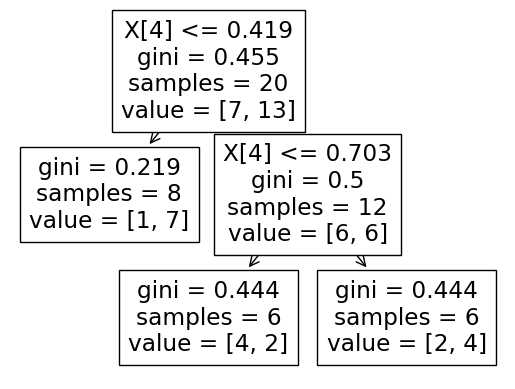

In [227]:
# Der im Beispiel verwendete Entscheidungsbaum
tree.plot_tree ( clf );


In [229]:
X_test.head()


,F0,F1,F2,F3,F4
40,0.867332,0.336623,0.518845,0.726491,0.561026
41,0.021726,0.696199,0.131128,0.516053,0.392497
42,0.767732,0.090596,0.049037,0.937811,0.486237
43,0.152259,0.503091,0.666234,0.894390,0.390633
44,0.756945,0.304682,0.714374,0.801033,0.963154


In [230]:
# Predictions
clf.predict ( X_test.head() )


array([0, 1, 0, 1, 1])

**Algorithmus**:
- Für jede Observation (=Zeile in `X_test`), ermittle das zugehörige Blatt im Entscheidungsbaum.
- Wähle als Vorhersage die in diesem Blatt überwiegende Klasse.

`clf.predict` vs. `clf.predict_proba`:

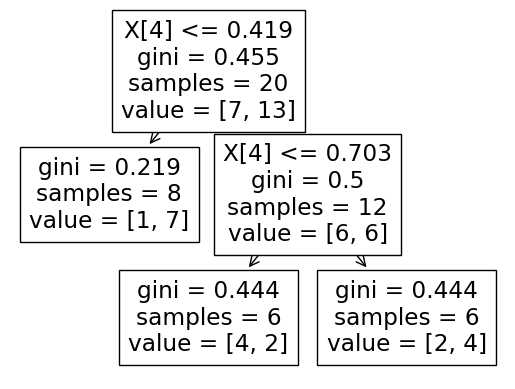

In [233]:
tree.plot_tree ( clf );


In [229]:
X_test.head()


,F0,F1,F2,F3,F4
40,0.867332,0.336623,0.518845,0.726491,0.561026
41,0.021726,0.696199,0.131128,0.516053,0.392497
42,0.767732,0.090596,0.049037,0.937811,0.486237
43,0.152259,0.503091,0.666234,0.894390,0.390633
44,0.756945,0.304682,0.714374,0.801033,0.963154


In [235]:
# Die der Klassifikation zugrundeliegenden
# Klassenverhältnisse in den jeweiligen Blättern
# (die zweite Spalte nennt man "Scores")
clf.predict_proba ( X_test.head() )




array([[0.66666667, 0.33333333],
       [0.125     , 0.875     ],
       [0.66666667, 0.33333333],
       [0.125     , 0.875     ],
       [0.33333333, 0.66666667]])

<div class="alert alert-block alert-warning"><b>Frage:</b> Wie können Sie die Predictions aus den Scores berechnen?<br>Welchen Zusatznutzen haben die Scores?</div>

<div class="alert alert-block alert-success">Durch Vergleich mit einem Threshold wird eine Prediction zu einer 0/1-Vorhersage. Scores geben Auskunft darüber, wie "sicher" sich das Modell ist.</div>

**Best Practices:**
- Für nicht-temporale Daten sollte die Aufteilung in die Teilmengen randomisiert erfolgen.
- Es sollte zumindest nach der Zielgröße `y` stratifiziert werden, ggf. auch nach Features wie Geschlecht, ...; bei großen Datenmengen ist die Verteilung der Merkmale in den Teilmengen automatisch sehr ähnlich (Gesetz der großen Zahlen) und eine explizite Stratifizierung ist weniger wichtig.
- Für den Split in Train/Validation/Testset wurden hier vereinfachend die Anteile 1/3, 1/3, 1/3 gewählt.  
Üblicherweise werden mehr Daten fürs Training reserviert, z.B. 60/20/20 oder 80/10/10. 

<div class="alert alert-block alert-warning"><b>Frage:</b> Welcher Trade-off welcher Zielgrößen ist zu beachten, wenn über die Aufteilung der Datenpunkte in die Trainings-, Validierungs- und Testdatensätzen entschieden wird?</div>

<div class="alert alert-block alert-success">
Einerseits möchte man möglichst viele Datenpunkte im Trainingsdatensatz haben, damit das Modell möglichst gut lernt und ein Overfit minimiert wird. <br><br>
Andererseits braucht man genügend viele Daten im Validierungs- und Testdatensatz, um Aussagen über die Generalisierungsfähigkeit auf ungesehenen Daten und über die Güte des finalen Modells zu ermöglichen. 
</div>

**Best Practices(ctd.):** 
- Bei **temporalen Daten** (z.B. Zeitreihen) sollte die zeitliche Struktur beim Split beibehalten werden: kleine Zeitstempel in die Trainings-, mittlere Zeitstempel in die Validierungs- und hohe Zeitstempel in die Testdaten. Denn:  
&nbsp;
    - Es soll die Generalisierungsfähigkeit überprüft werden, hierbei möchte man möglichst nahe am tatsächlichen Einsatzszenario bleiben: zukünftige Daten sollen basierend auf einem Modell, das auf vergangenen Daten trainiert wurde, vorhergesagt werden. 
    - Es ist schwerer, aus einer Zeitreihe zukünftige Datenpunkte zu extrapolieren, als zufällig ausgewählte Punkte zu interpolieren. Bei einem randomisierten Split würde die Generalisierungsfähigkeit zu optimistisch bewertet werden.


<img src="VL04_Material/colormap_sequential.png" width="80%" /> 
<div class="tinyfont">https://matplotlib.org/stable/tutorials/colors/colormaps.html</div>

# <div>1. Die Holdout-Methode</div>
# <div style="color:blue;">2. Indizierung in Pandas</div>

### 2.1 Slicing in Pandas

In [126]:
import pandas as pd
df = pd.read_csv("VL02_Material/heart.csv")


# mit .head() zeigt man nur die ersten Zeilen an
df.head()


# mit .tail() werden die letzten Zeilen
# angezeigt.


# Mit dem Parameter n (default n=5)
# wird die Anzahl der Zeilen spezifiziert.


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [42]:
# Einfacher Zugriff auf eine Spalte
df["ChestPainType"].head()


0    ATA
1    NAP
2    ATA
3    ASY
4    NAP
Name: ChestPainType, dtype: object

In [43]:
# einfacher Zugriff auf ausgewählte Zeilen
df[3:6]


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


Boolean Indexing (wie in Numpy):

In [134]:
# Boolscher Vektor
idx = (df["ChestPainType"] == "ASY")
idx


0      False
1      False
2      False
3       True
4      False
       ...  
913    False
914     True
915     True
916    False
917    False
Name: ChestPainType, Length: 918, dtype: bool

In [132]:
# "Boolean Indexing"
df["Age"][ idx ]

3      48
8      37
13     49
16     38
18     60
       ..
909    63
911    59
912    57
914    68
915    57
Name: Age, Length: 496, dtype: int64

In [46]:
 # ... mit anschließender Aggregierung
df["Age"][idx].mean()


54.95967741935484

In [139]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Integer Array Indexing (wie in Numpy):

In [138]:
# Spalte ChestPainType, Zeile 0 und 1
df["ChestPainType"][ [0,1] ]


0    ATA
1    NAP
Name: ChestPainType, dtype: object

<div class="alert alert-block alert-warning"><b>Frage:</b> Greifen wir auf Zeilennummern zu, oder auf Zeilennamen (=Index)?</div>

Mehrdeutigkeiten vermeiden mit `.loc` und `.iloc`:

In [49]:
# Indizierung mit .loc verwendet Spaltennamen
df.loc[:,"ChestPainType"].head()


0    ATA
1    NAP
2    ATA
3    ASY
4    NAP
Name: ChestPainType, dtype: object

In [50]:
# Indizierung mit .iloc verwendet Spaltennummern
df.iloc[:,2].head()


0    ATA
1    NAP
2    ATA
3    ASY
4    NAP
Name: ChestPainType, dtype: object

In [51]:
# Zugriff auf Spaltennamen und Index
df.loc[3,"ChestPainType"]


'ASY'

In [52]:
# Zugriff auf Spalten- und Zeilennummer
df.iloc[3,2]


'ASY'

Mit `.loc` und `.iloc` können Unklarheiten vermieden werden:

In [53]:
# Zugriff auf mehrere Elemente über deren Namen
df.loc[[0,1],"ChestPainType"]


0    ATA
1    NAP
Name: ChestPainType, dtype: object

In [54]:
# Zugriff auf mehrere Elemente über deren Nummern
df.iloc[[0,1],2]


0    ATA
1    NAP
Name: ChestPainType, dtype: object

In [55]:
# jetzt stimmen Zeilennamen (=Index) nicht mehr mit der natürlichen Nummerierung überein
df = df[::-1]
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1


In [56]:
# Zugriff auf mehrere Elemente über deren Namen
df.loc[[0,1],"ChestPainType"]


0    ATA
1    NAP
Name: ChestPainType, dtype: object

In [57]:
# Zugriff auf mehrere Elemente über deren Nummern
df.iloc[[0,1],2]


917    NAP
916    ATA
Name: ChestPainType, dtype: object

### 2.2 Index in Pandas: "Spaltennamen für die Zeilen"

Neuer Index:

In [58]:
# mit reset_index wird der Index zu einer Spalte, und ein "generischer" Index wird hinzugefügt
# (Rückgabe als Kopie, df bleibt unverändert)
df.reset_index().head()


,index,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0
1,916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
2,915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
3,914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
4,913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1


Überschreiben des alten Index durch einen neuen:

In [59]:
# setze neuen Index (Rückgabewert ist eine Kopie)
df.set_index("Age").head()


,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,,,,,,,,,,,
38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0
57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1


Manuelle Zuweisung eines Index (der nicht eindeutig sein muss):

In [60]:
import numpy as np
df.index = np.where ( df.index % 2 == 0, "A", "B")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
B,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0
A,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
B,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
A,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
B,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
A,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
B,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
A,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
B,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


In [61]:
df.loc["A","ChestPainType"]

A    ATA
A    ASY
A    ASY
A    ATA
A    ASY
    ... 
A    ASY
A    ATA
A    NAP
A    ATA
A    ATA
Name: ChestPainType, Length: 459, dtype: object

In [62]:
# Hier wurde np.where verwendet:
# Dies ist ein vektorisiertes "ternary" if/else
np.where( [True,False,True], [1,2,3], ["A","B","C"] )

array(['1', 'B', '3'], dtype='<U11')

**Ausblick:** Verwendung mehrerer Spalten zur Indizierung resultiert in einem sog. Multiindex:

In [140]:
df.set_index( ["Sex","Age"] ).sort_index()

ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
Sex Age                                                                      
F   30             TA        170          237          0         ST    170   
    31            ATA        100          219          0         ST    150   
    32            ATA        105          198          0     Normal    165   
    33            ASY        100          246          0     Normal    150   
    34            ATA        130          161          0     Normal    190   
...               ...        ...          ...        ...        ...    ...   
M   75            ASY        136          225          0     Normal    112   
    75            ASY        160          310          1     Normal    112   
    76            NAP        104          113          0        LVH    120   
    77            ASY        124          171          0         ST    110   
    77            ASY        125          304          0        LVH    162   

        ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
Sex Age                                                 
F   30               N      0.0       Up             0  
    31               N      0.0       Up             0  
    32               N      0.0       Up             0  
    33               Y      1.0     Flat             1  
    34               N      0.0       Up             0  
...                ...      ...      ...           ...  
M   75               Y      3.0     Flat             1  
    75               Y      2.0     Down             0  
    76               N      3.5     Down             1  
    77               Y      2.0       Up             1  
    77               Y      0.0       Up             1  

[918 rows x 10 columns]

In [8]:
# Zugriff mit "xs" auf die verschiedenen Index-Levels ("liefer mir alle 31-jährigen")
df.set_index( ["Sex","Age"] ).xs(31, axis=0,level=1)

,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Sex,,,,,,,,,,
M,ASY,120,270,0,Normal,153,Y,1.5,Flat,1
F,ATA,100,219,0,ST,150,N,0.0,Up,0


### 2.3 `train_test_split` für einen randomisierten Split

In [147]:
df = pd.read_csv("VL02_Material/heart.csv")

In [148]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df.iloc[:,-1] # Zielgröße HeartDisease


Verwende `train_test_split`, um Trainingsdaten abzuseparieren:


In [149]:
# train_size als float (=Anteil der Gesamtmenge)
# oder als int (=Anzahl Datenpunkte)
X_train, X_rest, y_train, y_rest = train_test_split(
    X, y, train_size=1/3, random_state=123 )

len(X_train), len(X_rest), \
   y_train.mean(), y_rest.mean()
# 60% der Personen in den Trainingsdaten sind krank

(306, 612, 0.6013071895424836, 0.5294117647058824)

In [150]:
# Argument "stratify", um die Werte angegebener
# Spalten gleichmäßig auf die Zielmengen zu verteilen
X_train, X_rest, y_train, y_rest = train_test_split(
    X,y,train_size=1/3,random_state=123,stratify=y )

len(X_train), len(X_rest), \
   y_train.mean(), y_rest.mean()
# je 55% der Trainings- UND Testpatienten sind krank

(306, 612, 0.5522875816993464, 0.553921568627451)

Erneuter Split, um weiter in Validierungs- und Testdaten aufzuteilen mit `train_test_split(..., train_size=?)`:

In [151]:

X_val, X_test, y_val, y_test = train_test_split (
    X_rest,y_rest,train_size=1/2,random_state=456 )

len(X_train), len(X_val), len(X_test),\
   y_train.sum(), y_val.sum(), y_test.sum()


(306, 306, 306, 169, 178, 161)

In [152]:

# erneut mit Stratifizierung:
X_val, X_test, y_val, y_test = train_test_split (
    X_rest,y_rest,train_size=1/2,random_state=456,
    stratify=y_rest )

len(X_train), len(X_val), len(X_test),\
   y_train.sum(), y_val.sum(), y_test.sum()


(306, 306, 306, 169, 169, 170)

<img src="VL04_Material/colormap_sequential.png" width="80%" /> 
<div class="tinyfont">https://matplotlib.org/stable/tutorials/colors/colormaps.html</div>

# <div style="color:gray;">1. Die Holdout-Methode</div>
# <div style="color:gray;">2. Indizierung in Pandas</div>


# Vielen Dank für Ihre Aufmerksamkeit!